# Credit Card Fraud Detection
Sri Bagus N <br/>
01 08 22

This dataset contains credit cards transactions in September 2013 by European cardholders. Almost all of the features contains only numerical input variables transformed by PCA due to confidentiality issues. The only features which have not been transformed are 'Time' and 'Amount' along with 'Class' as the label. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction while the feature 'Amount' is the transaction amount. Feature 'Class' is the response variable or the label with 1 for a fraud case and 0 for otherwise.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## EDA

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

rows = df.shape[0] 
cols = df.shape[1]
print(rows, 'rows')
print(cols, 'columns')

284807 rows
31 columns


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Not a single null

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# list the max value of each features
df.describe().iloc[-1]

Time      172792.000000
V1             2.454930
V2            22.057729
V3             9.382558
V4            16.875344
V5            34.801666
V6            73.301626
V7           120.589494
V8            20.007208
V9            15.594995
V10           23.745136
V11           12.018913
V12            7.848392
V13            7.126883
V14           10.526766
V15            8.877742
V16           17.315112
V17            9.253526
V18            5.041069
V19            5.591971
V20           39.420904
V21           27.202839
V22           10.503090
V23           22.528412
V24            4.584549
V25            7.519589
V26            3.517346
V27           31.612198
V28           33.847808
Amount     25691.160000
Class          1.000000
Name: max, dtype: float64

It can be seen from the min and max values of the transformed features that they don't have the same scale. Even though we don't really know what those features are derived from, we can still use this information to try scaling the data before modelling.

In [7]:
# Statistics of Amount feature where the transaction is non-fraudulent
df[df['Class']==0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
# Statistics of Amount feature where the transaction is fraudulent
df[df['Class']==1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
# Total amount transactions in percentage for both class
pie = go.Figure(data = [go.Pie(labels = ['Non-fraud', 'Fraud'], 
                              values = [df[df['Class']==0].Amount.sum(), 
                                        df[df['Class']==1].Amount.sum()], 
                              hole = .7)])
pie.update_layout(title_text = 'Transaction Percentage')
pie.show()

Only 0.239% of the transactions with the total amount of 60,127.97 are fraudulent.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



0    284315
1       492
Name: Class, dtype: int64

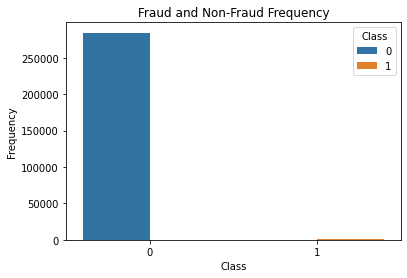

In [10]:
sns.countplot('Class', hue='Class', data=df)
plt.title ("Fraud and Non-Fraud Frequency")
plt.ylabel ("Frequency")

pd.value_counts(df['Class'])

We can conclude from the frequency, pie chart, and bar chart that this dataset is highly imbalanced, which means one category of the label is provided a lot more than the other (284315:492 in this case). This disproportionality could cause some issues later such as overfitting. Some approaches will be conducted in data preprocessing section.

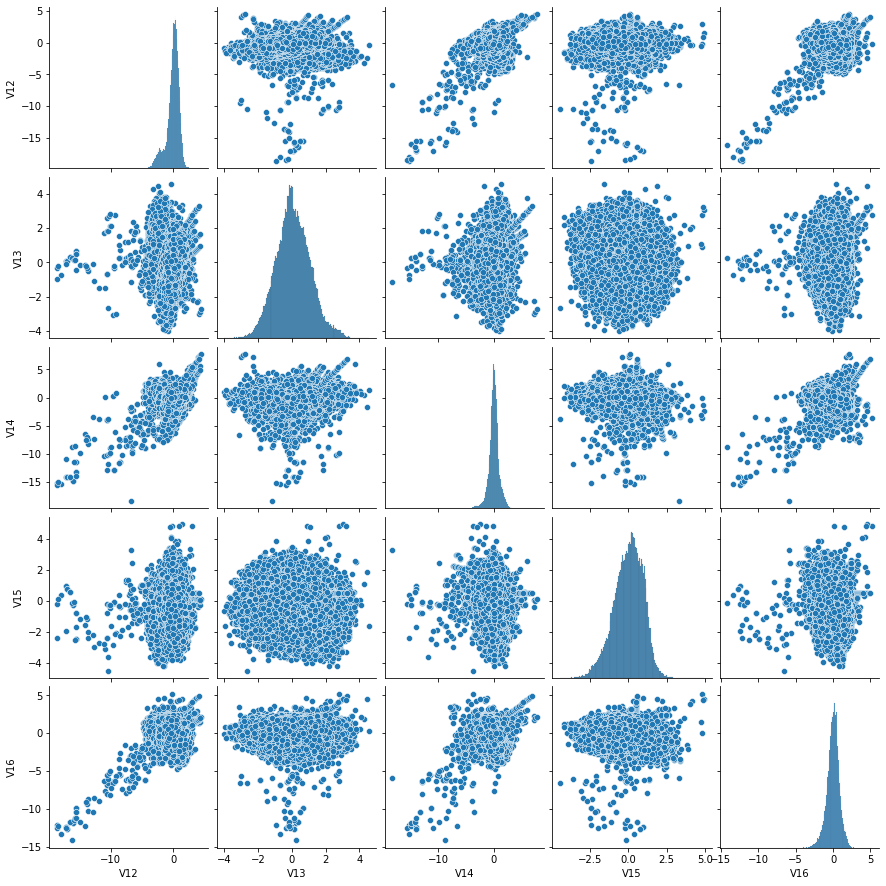

In [11]:
# slice some transformed features (v12 - 16) 
# and take only the middle 1/3 of the data
df_v = df.iloc[int(rows/3):int(rows*2/3), 12:17]
df_v.head()

# pairplot each selected features
sns.pairplot(data=df_v)

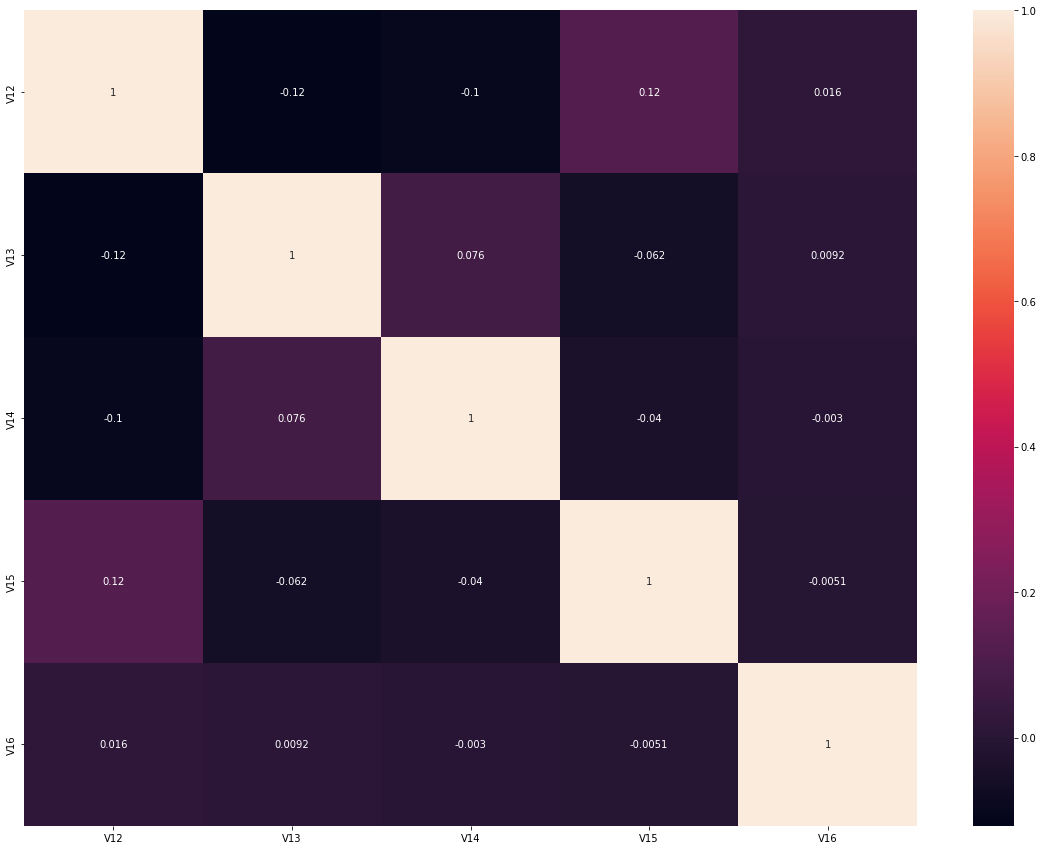

In [12]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_v.corr(), annot=True)
plt.show()

It seems like some transformed features have postive correlation based on the pairplot, but from the heatmap we can really see how insignificant the correlations are. This might be caused by some unevenly distributed data in respect to another feature which can be seen on the pairplot even though they appear to be having positive correlation patterns. Since we don't know what those features really are we can't interpret much from this.

## Preprocess

### Balancing the data
There are two approaches I'd like to use:
- **Oversampling**
<br/>Using SMOTE on data labeled as fraud (1)
- **Undersampling + Oversampling**
<br/>Dropping some non-fraud data then use SMOTE on data labeled as fraud

#### Oversampling

In [13]:
xo, yo = SMOTE().fit_resample(df.iloc[:, :-1], df.iloc[:, -1])

print(xo.shape[0], 'rows')
print(xo.shape[1], 'columns')

print(pd.value_counts(yo)[0], 'non-fraud')
print(pd.value_counts(yo)[1], 'fraud')

568630 rows
30 columns
284315 non-fraud
284315 fraud


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



0    284315
1    284315
Name: Class, dtype: int64

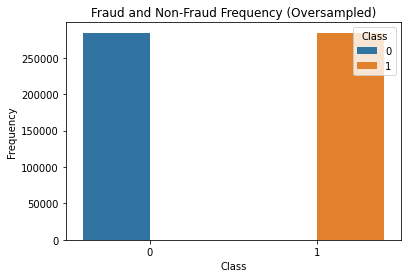

In [14]:
df_o = pd.concat([xo, yo], axis=1)

sns.countplot('Class', hue='Class', data=df_o)
plt.title ("Fraud and Non-Fraud Frequency (Oversampled)")
plt.ylabel ("Frequency")

pd.value_counts(df_o['Class'])

We now have balanced data by oversampling class 1 with SMOTE. Note that this approach generates ~99% synthetic data for class 1.

#### Undersampling + Oversampling
The idea is to limit oversampling to only twice the data after undersampling the other class to that amount.

In [15]:
# undersampling
minor = len(df[df['Class']==1]) # calculate the amount of minority class
os_limit = minor*2 # double it

major_indices = df[df['Class']==0].index # list majority indices
shuffle_major_indices = np.random.choice(major_indices, # shuffle majority indices
                                         os_limit, # only to twice the amount of minority class data
                                         replace=0)

minor_indices = df[df['Class']==1].index # list minority indices
total_indices = np.concatenate([shuffle_major_indices, minor_indices]) # concat both indices
df_u = df.loc[total_indices] # slice the dataframe

len(shuffle_major_indices)

984

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



0    984
1    492
Name: Class, dtype: int64

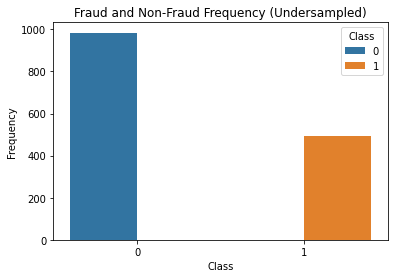

In [16]:
sns.countplot('Class', hue='Class', data=df_u)
plt.title ("Fraud and Non-Fraud Frequency (Undersampled)")
plt.ylabel ("Frequency")

pd.value_counts(df_u['Class'])

In [17]:
# oversampling
xou, you = SMOTE().fit_resample(df_u.iloc[:, :-1], df_u.iloc[:, -1])

print(xou.shape[0], 'rows')
print(xou.shape[1], 'columns')

print(pd.value_counts(you)[0], 'non-fraud')
print(pd.value_counts(you)[1], 'fraud')

1968 rows
30 columns
984 non-fraud
984 fraud


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



0    984
1    984
Name: Class, dtype: int64

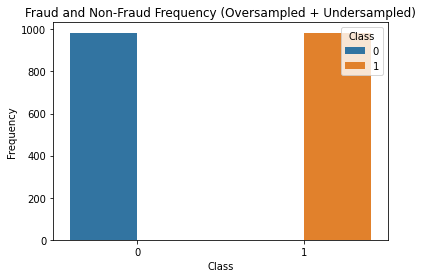

In [18]:
df_ou = pd.concat([xou, you], axis=1)

sns.countplot('Class', hue='Class', data=df_ou)
plt.title ("Fraud and Non-Fraud Frequency (Oversampled + Undersampled)")
plt.ylabel ("Frequency")

pd.value_counts(df_ou['Class'])

### Splitting & Scaling

#### Original Dataset

In [19]:
# splitting
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=84)

# # scaling
# scaler = MinMaxScaler()

# scaler.fit(x_train)
# x_train_s = scaler.transform(x_train)

# scaler.fit(x_test)
# x_test_s = scaler.transform(x_test)

#### Overfitted Dataset

In [20]:
# splitting
xo_train, xo_test, yo_train, yo_test = train_test_split(xo, yo, test_size=0.3, random_state=84)

# # scaling
# scaler = MinMaxScaler()

# scaler.fit(xo_train)
# xo_train_s = scaler.transform(xo_train)

# scaler.fit(xo_test)
# xo_test_s = scaler.transform(xo_test)

#### Overfitted + Underfitted Dataset

In [21]:
# splitting
xou_train, xou_test, you_train, you_test = train_test_split(xou, you, test_size=0.3, random_state=84)

# scaling
scaler = MinMaxScaler()

scaler.fit(xou_train)
xou_train_s = scaler.transform(xou_train)

scaler.fit(xo_test)
xou_test_s = scaler.transform(xou_test)

Since the original dataset took quite a long time to train and the oversampled even much longer, I only scaled the least dataset.

## Modelling

In [22]:
def modelling(X_train, y_train, X_test, y_test):
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import svm
    from sklearn.neighbors import KNeighborsClassifier
    from xgboost import XGBClassifier
    from sklearn.metrics import f1_score
    
    # logistic regression
    model1 = LogisticRegression(random_state=84)
    model1.fit(X_train, y_train)
    pred1 = model1.predict(X_test)
    fs1 = f1_score(y_test, pred1)
    
    # Random Forest Classifier
    model2 = RandomForestClassifier(random_state=84)
    model2.fit(X_train, y_train)
    pred2 = model2.predict(X_test)
    fs2 = f1_score(y_test, pred2)
    
    # SVC
    model3 = svm.SVC(random_state=84)
    model3.fit(X_train, y_train)
    pred3 = model3.predict(X_test)
    fs3 = f1_score(y_test, pred3)
    
    # Xtreme Gradient Boost
    model4 = XGBClassifier(random_state=84, eval_metric='error')
    model4.fit(X_train, y_train)
    pred4 = model4.predict(X_test)
    fs4 = f1_score(y_test, pred4)
    
    print(f'\n \n Model Score\n',
          f'Logistic Regression\t : \t {model1.score(X_train, y_train)}\n',
          f'Random Forest Classifier: \t {model2.score(X_train, y_train)}\n',
          f'SVC\t \t \t : \t {model3.score(X_train, y_train)}\n',
          f'Xtreme Gradient Boost\t : \t {model4.score(X_train, y_train)}')
    
    print(f'\n \n F1 Score\n',
          f'Logistic Regression\t : \t {fs1}\n',
          f'Random Forest Classifier: \t {fs2}\n',
          f'SVC\t \t \t : \t {fs3}\n',
          f'Xtreme Gradient Boost\t : \t {fs4}\n \n')
    
    return model1, model2, model3, model4

In [23]:
m1, m2, m3, m4 = modelling(x_train, y_train, x_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 
 Model Score
 Logistic Regression	 : 	 0.9989265865452138
 Random Forest Classifier: 	 1.0
 SVC	 	 	 : 	 0.9981842258381654
 Xtreme Gradient Boost	 : 	 1.0

 
 F1 Score
 Logistic Regression	 : 	 0.7096774193548386
 Random Forest Classifier: 	 0.8739495798319328
 SVC	 	 	 : 	 0.0
 Xtreme Gradient Boost	 : 	 0.8852459016393444
 



In [24]:
# mo1, mo2, mo3, mo4 = modelling(xo_train, yo_train, xo_test, yo_test)

### took too long to finish, stopped mid training

In [25]:
mou1, mou2, mou3, mou4 = modelling(xou_train, you_train, xou_test, you_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 
 Model Score
 Logistic Regression	 : 	 0.9477124183006536
 Random Forest Classifier: 	 1.0
 SVC	 	 	 : 	 0.5679012345679012
 Xtreme Gradient Boost	 : 	 1.0

 
 F1 Score
 Logistic Regression	 : 	 0.953206239168111
 Random Forest Classifier: 	 0.9612676056338029
 SVC	 	 	 : 	 0.6121212121212122
 Xtreme Gradient Boost	 : 	 0.9756944444444443
 



Turns out that the best overall score came from XGB trained on undersampled + oversampled data. That said, the next step is to try training on scaled undersampled + oversampled data.

In [26]:
mou_s1, mou_s2, mou_s3, mou_s4 = modelling(xou_train_s, you_train, xou_test_s, you_test)


 
 Model Score
 Logistic Regression	 : 	 0.9484386347131445
 Random Forest Classifier: 	 1.0
 SVC	 	 	 : 	 0.9520697167755992
 Xtreme Gradient Boost	 : 	 1.0

 
 F1 Score
 Logistic Regression	 : 	 0.6643835616438356
 Random Forest Classifier: 	 0.6651428571428571
 SVC	 	 	 : 	 0.6643835616438356
 Xtreme Gradient Boost	 : 	 0.7673796791443851
 



The same model trained on scaled data performed worse with only 0.67 as the best f1 score, also came from XGB. This broke my assumption that  transformed features are not at the same scale, the original dataset might already got these features scaled besides transofrmed it.

## Additional Preprocess
### Outliers Removal

#### IQR Outliers Detection

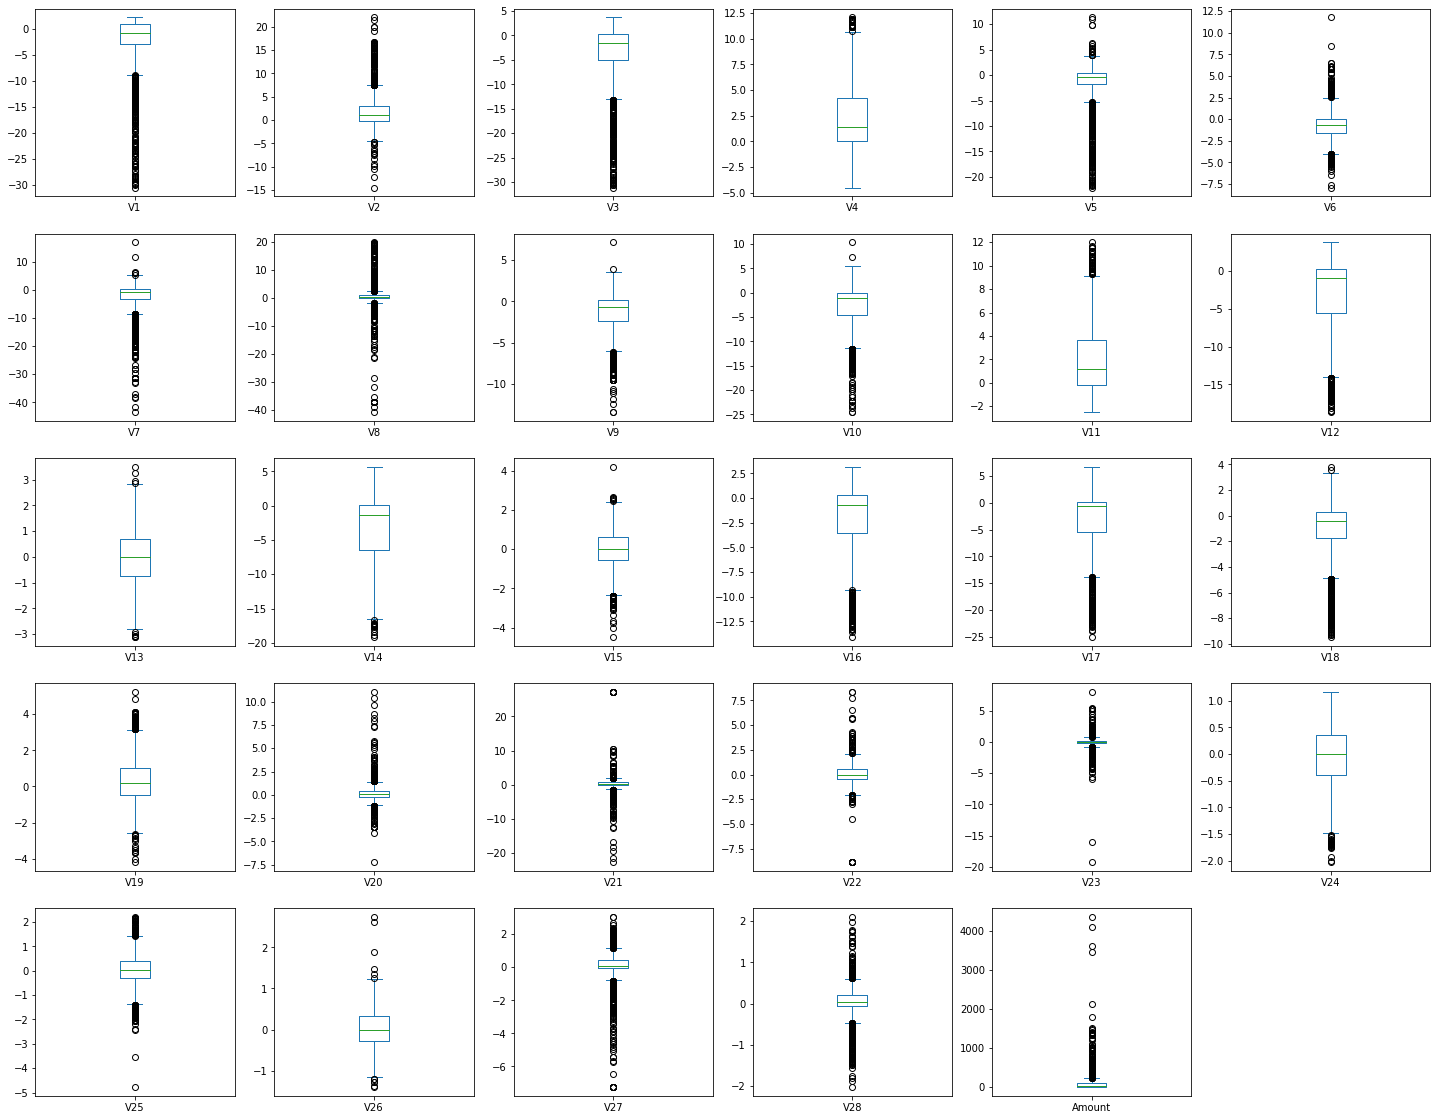

In [27]:
# box plot all features except id
df_ou.iloc[:, 1:-1].plot(kind='box', subplots = True, layout = (5,6), figsize = (25,20))
plt.show()

In [28]:
# define IQR
Q1 = df_ou.quantile(0.25)
Q3 = df_ou.quantile(0.75)
IQR = Q3-Q1

# define limit
lowlim = Q1 - 1.5*IQR
uplim = Q3 + 1.5*IQR

# filtering
df_ou_iqr = df_ou[~((df_ou < lowlim) | (df_ou > uplim)).any(axis=1)]

print('dropped', df_ou.shape[0]-df_ou_iqr.shape[0], 'rows \n')
df_ou_iqr.info()

dropped 893 rows 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075 entries, 2 to 1964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1075 non-null   float64
 1   V1      1075 non-null   float64
 2   V2      1075 non-null   float64
 3   V3      1075 non-null   float64
 4   V4      1075 non-null   float64
 5   V5      1075 non-null   float64
 6   V6      1075 non-null   float64
 7   V7      1075 non-null   float64
 8   V8      1075 non-null   float64
 9   V9      1075 non-null   float64
 10  V10     1075 non-null   float64
 11  V11     1075 non-null   float64
 12  V12     1075 non-null   float64
 13  V13     1075 non-null   float64
 14  V14     1075 non-null   float64
 15  V15     1075 non-null   float64
 16  V16     1075 non-null   float64
 17  V17     1075 non-null   float64
 18  V18     1075 non-null   float64
 19  V19     1075 non-null   float64
 20  V20     1075 non-null   float64
 21  V21     1075 non-n

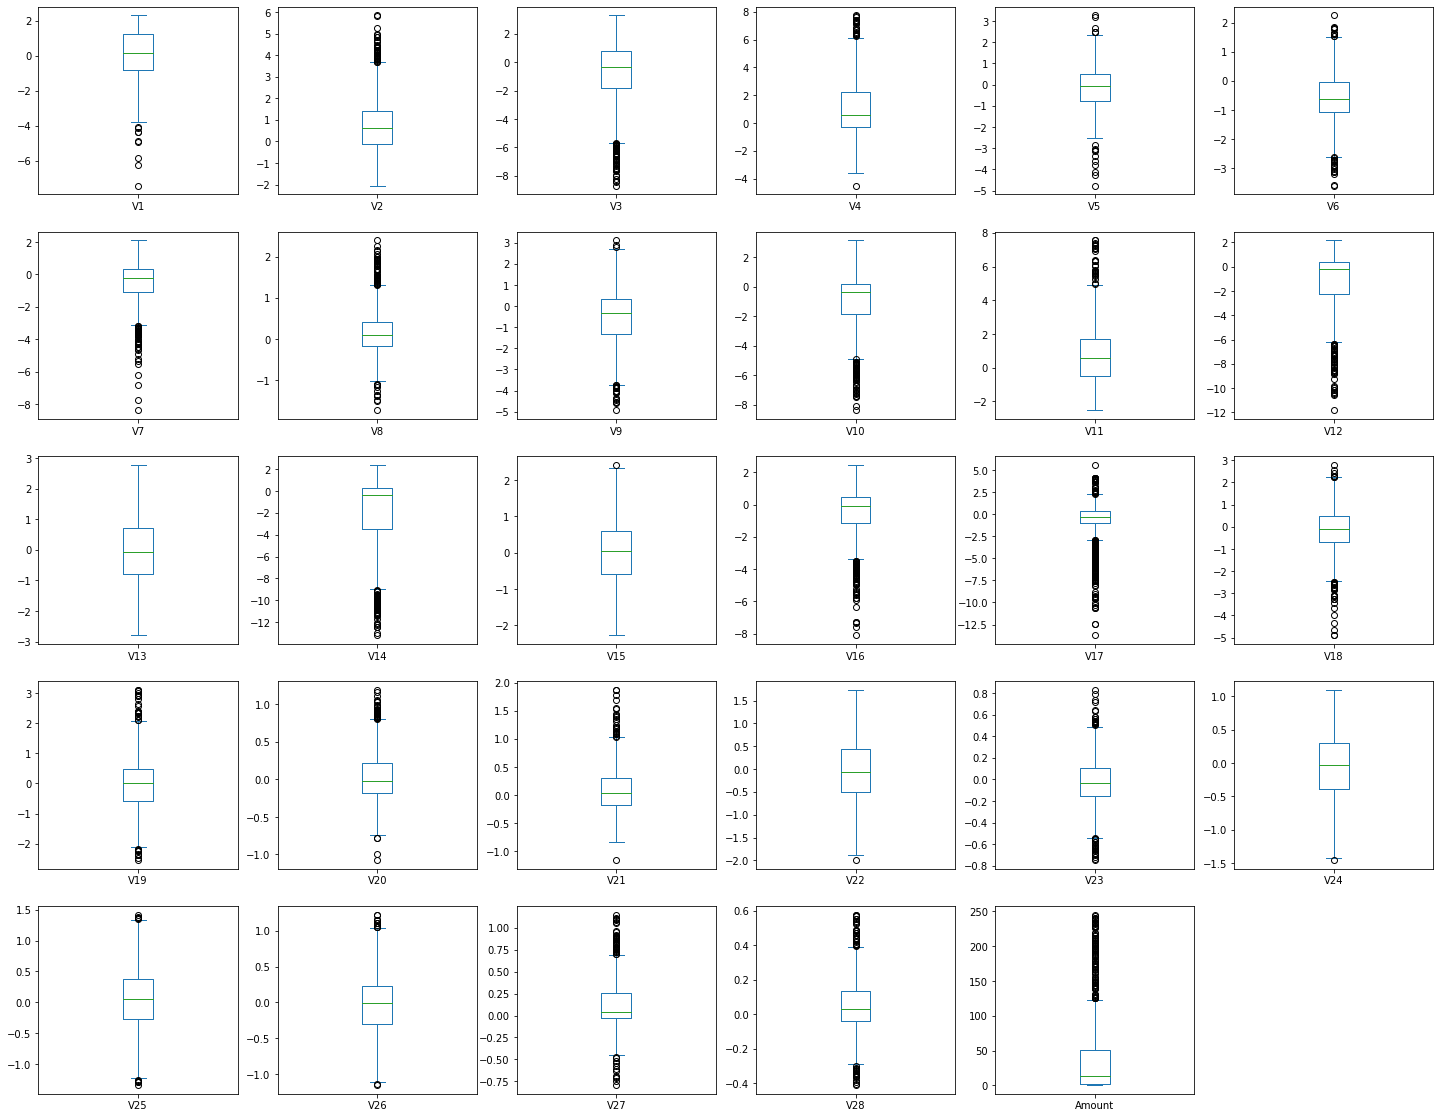

In [29]:
# box plot all filtered features
df_ou_iqr.iloc[:, 1:-1].plot(kind='box', subplots = True, layout = (5,6), figsize = (25,20))
plt.show()

In [30]:
# splitting IQR filterred data
xou_iqr_train, xou_iqr_test, you_iqr_train, you_iqr_test = train_test_split(df_ou_iqr.iloc[:, :-1], 
                                                                    df_ou_iqr.iloc[:, -1], 
                                                                    test_size=0.3, 
                                                                    random_state=84)

In [31]:
mou_iqr1, mou_iqr2, mou_iqr3, mou_iqr4 = modelling(xou_iqr_train, you_iqr_train, xou_iqr_test, you_iqr_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 
 Model Score
 Logistic Regression	 : 	 0.9601063829787234
 Random Forest Classifier: 	 1.0
 SVC	 	 	 : 	 0.675531914893617
 Xtreme Gradient Boost	 : 	 1.0

 
 F1 Score
 Logistic Regression	 : 	 0.9430051813471503
 Random Forest Classifier: 	 0.9368421052631579
 SVC	 	 	 : 	 0.0
 Xtreme Gradient Boost	 : 	 0.9375
 



## Conclusion
- Model mou4 trained with XGB on undersampled + oversampled original dataset without any scaling or outliers removal remains as the best model so far with model score 1. 0 and f1 score 0.97.
- Outliers removal with IQR slightly decrease the score and even worse for SVC. 
- The original dataset might already got transformed features scaled.

Oversampled dataset will be trained along with another outliers removal method in the future version of this notebook.